# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

  **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**
  
  * The TikTok platform is struggling with detecting and reviewing regulation-violated videos and deal with users report to videos that they believe violate the platform's terms of service, because TikTok is a enomous company and deal with a very large number of videos, so we want to find an efficient way of dealing with service-violated videos.

  * Previous analysis shows that claim videos are more likely to violate regulations, so we think it will be efficient to determine the videos' claim_status, in order to furthur deal with the violation problem.

  * In order to accurately determine the claim_status of a specific video, we want to build a machine learning model for this task. After accurately determined the claim_status of videos, we can further review and deal with claim videos, as they are more likely to violate rules, we will assign a high priority to claim videos and review and process them mannually by humans.

**Modeling design and target variable**

  * The prediction target in this task is the claim_status column of each video, this is a binary variable that indicates whether a video is a claim or an opinion. Because we want to predict this claim_status, which is a binary variable, so we will build classification models for predicting it.

**Select an evaluation metric**

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:

  - **False positives:** When the model predicts a video is a claim when in fact it is an opinion
  - **False negatives:** When the model predicts a video is an opinion when in fact it is a claim

  **What are the ethical implications of the model? What are the consequences of your model making errors?**
   
  *   In this specific task, when a in fact claim video is missclassified to a opinion video (False positives), although it will need to be reviewed and processed by human, we can still improve the best performance of detecting accuatually rule-violated videos, which is a very important target for the TikTok company. In the opesite, when a in fact opinion video is missclassified to a claim video (False negatives), we may miss the opptunity of correctly detecting rule-violation videos, which is not good for the platform. So it is more important for the TikTok company to prevent False negatives such situation, in order to minimize the False negatives, we choose to use the recall metric for this prediction task.

  **How would you proceed?**
**Modeling workflow and model selection process**

- Preprocess and clean the dataset
- Split the dataset into train/validation/test sets (60/20/20)
- Fit different machine learning models and tune hyperparameters on the training set 
- Apply different trained models on the validation set
- Apply the best performed model on the test set



### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [4]:
# Import packages for data modeling
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
# Import packages for data modeling
### YOUR CODE HERE ###
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
# Import packages for data modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [29]:
# Load dataset into dataframe
data = pd.read_csv("/Users/mavehw/Downloads/google data advanced project/tiktok_dataset - tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [6]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [36]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [37]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [38]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [39]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [30]:
# Check for missing values
### YOUR CODE HERE ###
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [31]:
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(how= 'any',inplace = True)

In [32]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [33]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()
data.drop_duplicates(inplace= True)

Check for and handle outliers.

In [34]:
### YOUR CODE HERE ###
q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.75)
IQR = q3-q1
median = data['video_like_count'].median()
thershold = median+1.5*IQR
count_outliers =data[data['video_like_count']>thershold].count()
print(count_outliers)
data.loc[data['video_like_count']>thershold,'video_like_count'] = thershold 

#                           3468
claim_status                3468
video_id                    3468
video_duration_sec          3468
video_transcription_text    3468
verified_status             3468
author_ban_status           3468
video_view_count            3468
video_like_count            3468
video_share_count           3468
video_download_count        3468
video_comment_count         3468
dtype: int64


Check class balance.

In [35]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

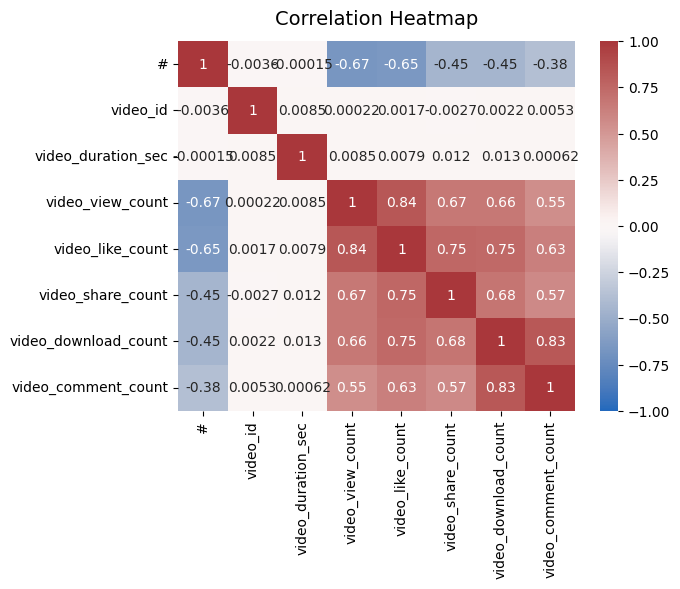

In [36]:
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [37]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['length'] = data['video_transcription_text'].apply(func= lambda x: len(x))
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,189717.375,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.000,81.0,8.0,2.0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.000,70.0,3.0,0.0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.000,7.0,2.0,1.0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.000,123.0,11.0,4.0,80


Calculate the average text_length for claims and opinions.

In [38]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data.groupby('claim_status')['video_transcription_text'].agg(func = lambda x : np.mean([len(text) for text in x])) 

claim_status
claim      95.376978
opinion    82.722562
Name: video_transcription_text, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

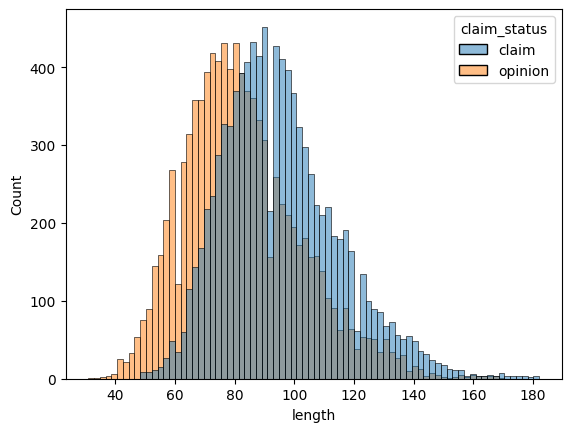

In [39]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data,x = 'length',hue = 'claim_status')
plt.show()

* The distributions of letter counts for claim and opinion videos are both roughly normal, skewed slightly to the right. Claim videos tend to contain more characters, about 13 more characters on average, as shown in the figure.

**Feature selection and transformation**

Encode target and catgorical variables.

In [40]:
# Create a copy of the X data
### YOUR CODE HERE ###
x_copy = data.copy()
# Drop unnecessary columns
x_copy = x_copy[['verified_status','author_ban_status']]
xonecoder = OneHotEncoder()
x_encoded = xonecoder.fit_transform(x_copy).toarray()
x_en = pd.DataFrame.from_records(x_encoded)
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
#print(x_en)

### **Task 4: Split the data**

Assign target variable.

In [41]:
# Isolate target variable
### YOUR CODE HERE ###
data = data.drop(['#', 'video_id','video_transcription_text'], axis=1)
# Encode target variable
pd.set_option('future.no_silent_downcasting', True)
data['claim_status'] = data['claim_status'].replace({'opinion': 0, 'claim': 1})
y = data['claim_status']

Isolate the features.

In [42]:
# Isolate features
X = data.drop(['claim_status','verified_status','author_ban_status'], axis=1)
bbb= pd.DataFrame(x_encoded, columns=xonecoder.get_feature_names_out())
x_final= pd.concat([bbb,X],axis=1)
x_final.columns = x_final.columns.astype(str)

#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [43]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_tr, X_test, y_tr, y_test = train_test_split(x_final, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [44]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [45]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((12213, 12), (3054, 12), (3817, 12), (12213,), (3054,), (3817,))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [97]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=0)


# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


In [98]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [99]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9904496678589678

In [100]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
# Create a classification report
y_pred = rf_cv.best_estimator_.predict(X_val)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1513
       claim       1.00      0.99      1.00      1541

    accuracy                           1.00      3054
   macro avg       1.00      1.00      1.00      3054
weighted avg       1.00      1.00      1.00      3054



In [101]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 75}

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [102]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [103]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [104]:
xgb_cv.best_score_

0.9893167197306185

In [105]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
# Create a classification report
y_pred = xgb_cv.best_estimator_.predict(X_val)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1513
       claim       1.00      0.99      0.99      1541

    accuracy                           0.99      3054
   macro avg       0.99      0.99      0.99      3054
weighted avg       0.99      0.99      0.99      3054



**Question:** How well does your model perform? Consider recall score and precision score.

**Answer:**

This model also performs very well. Although its recall score is slightly lower than the random forest model, its precision score is perfect.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [107]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_val)


Display the predictions on the encoded testing set.

In [106]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred


array([1, 0, 1, ..., 0, 1, 1])

Display the true labels of the testing set.

In [108]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_val


5846     1
12058    0
2975     1
8432     1
6863     1
        ..
10274    0
3980     1
11695    0
6007     1
9200     1
Name: claim_status, Length: 3054, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

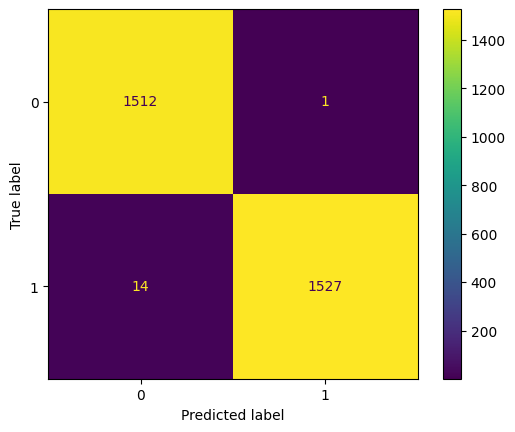

In [109]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [110]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1513
       claim       1.00      0.99      1.00      1541

    accuracy                           1.00      3054
   macro avg       1.00      1.00      1.00      3054
weighted avg       1.00      1.00      1.00      3054



**Question:** What does your classification report show? What does the confusion matrix indicate?


**Answer:**

The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 15 misclassifications&mdash;1 false postives and 14 false negatives.

#### **XGBoost**

In [111]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
y_pred = xgb_cv.best_estimator_.predict(X_val)

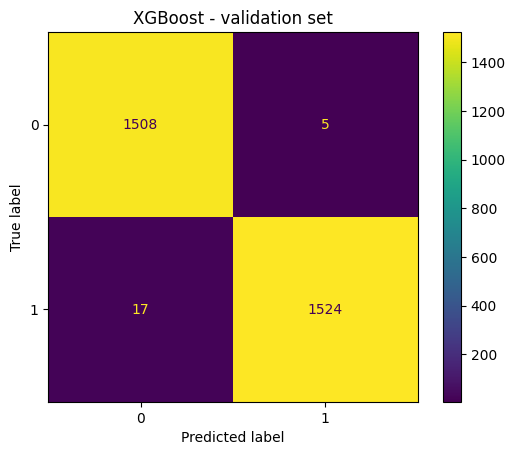

In [112]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set')
plt.show()

In [113]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1513
       claim       1.00      0.99      0.99      1541

    accuracy                           0.99      3054
   macro avg       0.99      0.99      0.99      3054
weighted avg       0.99      0.99      0.99      3054



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

**Answer:**


- The XGBoost model also achieved near-perfect results. However, its errors were often false negatives. Identifying claims is the primary task, so the model must be good at capturing all actual claim videos. The Random Forest model had a higher recall, making it the winner.

### **Use champion model to predict on test data**


Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case random forest performed a little bit better, so it is the champion model.

Now, use the champion model to predict on the test data.

In [114]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_test)

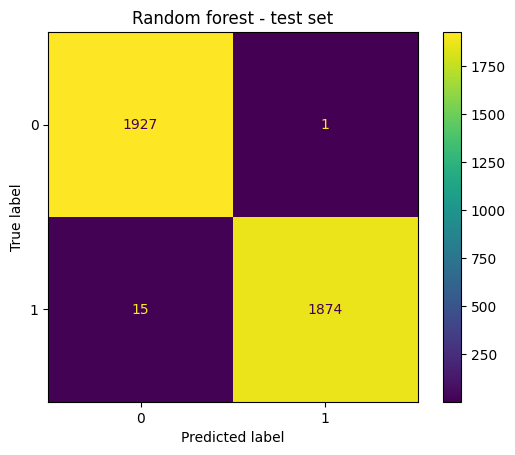

In [115]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set')
plt.show()

#### **Feature importances of champion model**


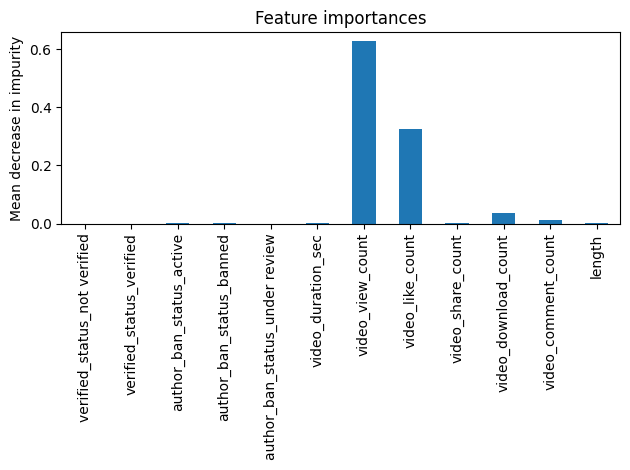

In [116]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

**Answer:** The level of engagement a video generates (such as video_view_count and video_like_count) is the most predictive feature. This is not surprising as our previous EDA also showed this trend.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**Answer:**

1. Would you recommend using this model? Why or why not? 

- Yes, this model can be recommended because it performs well on both validation and test dataset. In addition, the precision and F1 scores are consistently high. The model is very successful in classifying claims and opinions.

2. What is your model doing? Can you explain how it makes its predictions? 


- The model classifies the claim_status of a video, which is a binary target variable indicating whether the video is a claim or opinion video. The most predictive features of the model are all related to user engagement associated with each video, such as video_view_count and video_download_count.

3. Are there any new features you could design to improve the model performance? 


- Although the model currently performs almost perfectly, but we can still try to using other new features and test the new results on more testing data.

4. What features would you like to have to improve the performance of the model? 


- I think it might be helpful if we could get more features related to the author itself, such as the author's registration time and active time, because we can better understand the author and predict the possibility of them publishing statement videos or even violating platform regulations. In addition, we can also consider using some features in the video transcript, because in this assignment we only considered the length of the video transcript.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.